<a href="https://colab.research.google.com/github/LeeJeonJin/-GPT--AI-/blob/main/041-tips_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Assignment

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
data = pd.read_csv("tips.csv")

## Tips Data

In [11]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
data['sex'] = data['sex'].replace({'Female': 0, 'Male': 1})
data['smoker'] = data['smoker'].replace({'No': 0, 'Yes': 1})
data['time'] = data['time'].replace({'Lunch': 0, 'Dinner': 1})

# Ordinal encoding
data['day'] = data['day'].replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

<ipython-input-12-8d6a196432ff>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'Female': 0, 'Male': 1})
<ipython-input-12-8d6a196432ff>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace({'No': 0, 'Yes': 1})
<ipython-input-12-8d6a196432ff>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

In [13]:
data.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.569672
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


### 1. 평균 팁 구하기

In [14]:
data['tip'].mean()

np.float64(2.99827868852459)

### 2.'팁'에 대한 수치 요약을 확인하세요. 중앙값과 평균이 매우 다른가요? 이것이 현장에 대해 무엇을 말해주는가?

In [15]:
data['tip'].median()

2.9

따라서 중앙값과 평균은 거의 동일합니다.

분포가 대칭이면 평균은 중앙값과 같고 분포의 왜도는 0입니다.

### 3.'팁'에 대한 상자 그림을 준비합니다. 특이치가 있습니까?

<Axes: xlabel='tip'>

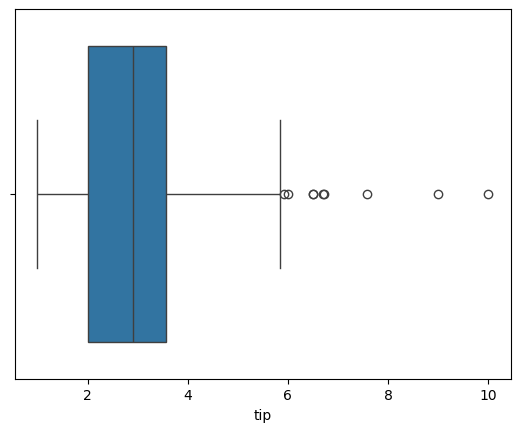

In [16]:
sns.boxplot(x="tip", data=data)

In [17]:
q3, q1 = np.percentile(data.tip, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  2.0
Lower Quatile:-  3.5625
IQR:-  1.56
Lower range in boxplot is -0.34, & the upper range is, 4.34


### 4.'total_bill'에 대한 상자 그림을 준비하세요. 이상값이 있나요?


<Axes: xlabel='total_bill'>

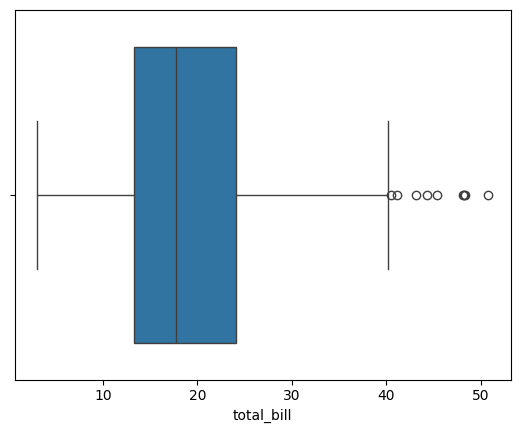

In [18]:
sns.boxplot(x="total_bill", data = data)

In [19]:
q3, q1 = np.percentile(data.total_bill, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  13.3475
Lower Quatile:-  24.127499999999998
IQR:-  10.78
Lower range in boxplot is -2.82, & the upper range is, 29.52


### 5. 성별: 데이터에서 여성의 비율은 얼마입니까?

In [20]:
data.groupby('sex').size()

,0
sex,
0,87
1,157


In [21]:
x = data.groupby("sex").size()
t = data["sex"].count()
p = x/t * 100
p[0]

np.float64(35.65573770491803)

### 6. 각 성별에 대한 기록의 백분율을 나타내는 막대가 포함된 막대 그래프를 준비합니다.

In [22]:
cnt = data.groupby(['sex']).count().reset_index()
cnt

,sex,total_bill,tip,smoker,day,time,size
0,0,87,87,87,87,87,87
1,1,157,157,157,157,157,157


In [23]:
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100
cnt

,sex,total_bill,tip,smoker,day,time,size,count_perc
0,0,87,87,87,87,87,87,35.655738
1,1,157,157,157,157,157,157,64.344262


<Axes: xlabel='sex', ylabel='count_perc'>

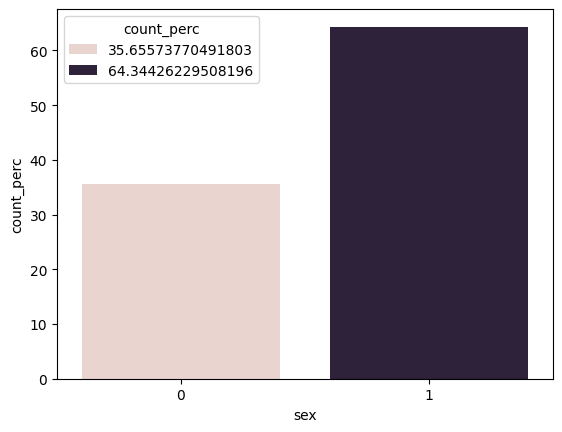

In [24]:
sns.barplot(x="sex",y='count_perc',
            hue = 'count_perc'
            ,data = cnt)

([<matplotlib.patches.Wedge at 0x7c1bef183910>,
 [Text(-0.9901862531346478, 0.4790941286461015, 'Female'),
  Text(0.9901862950183846, -0.47909404208126477, 'Male')],
 [Text(-0.5401015926188988, 0.26132407017060083, '35.7%'),
  Text(0.5401016154645734, -0.2613240229534171, '64.3%')])

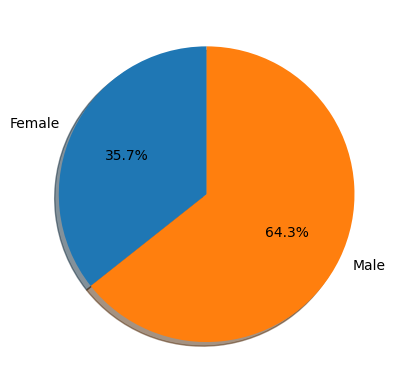

In [25]:
cnt = data.groupby(['sex']).count().reset_index()
cnt
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100

plt.pie(x='count_perc',data=cnt,labels=['Female', 'Male'], autopct='%1.1f%%',
       shadow=True, startangle=90)


### 7. 평균 팁은 성별에 따라 다른가요? 한 성별이 다른 성별보다 팁을 더 많이 주나요?

In [26]:
data.groupby(["sex"]).mean()['tip']

,tip
sex,
0,2.833448
1,3.089618


네, 남성 팁의 평균값이 여성 팁보다 큽니다.

### 8. 평균 팁은 시간대에 따라 다릅니까?

In [27]:
data.groupby(["day","time"]).mean()['tip']

day  time
0    0       2.767705
     1       3.000000
1    0       2.382857
     1       2.940000
2    1       2.993103
3    1       3.255132
Name: tip, dtype: float64

In [28]:
data.groupby(["day"]).mean()['tip']

,tip
day,
0,2.771452
1,2.734737
2,2.993103
3,3.255132


In [29]:
data.groupby(["time"]).mean()['tip']

,tip
time,
0,2.728088
1,3.102670


### 9. 평균 팁은 크기(테이블에 앉은 사람 수)에 따라 다른가요?

In [30]:
data.groupby('size').mean()['tip']

,tip
size,
1,1.437500
2,2.582308
3,3.393158
4,4.135405
5,4.028000
6,5.225000


### 10. 흡연자가 비흡연자보다 팁을 더 많이 주나요?

In [31]:
data.groupby('smoker').sum()['tip']

,tip
smoker,
0,451.77
1,279.81


### 11. 성별 대 흡연자/비흡연자 및 팁 크기 - 2x2를 만들고 평균 팁 크기를 구합니다. 팁을 가장 많이 주는 그룹은 어디인가요?

In [32]:
data.groupby(['sex','smoker']).mean()['tip']

sex  smoker
0    0         2.773519
     1         2.931515
1    0         3.113402
     1         3.051167
Name: tip, dtype: float64

### 12. 'pct_tip' = 팁/total_bill이라는 새로운 측정항목을 만듭니다. 이는 팁 제공 비율이며 팁 행동을 더 잘 측정하는 데 사용됩니다.

In [33]:
data['pct_tip'] = data['tip']/data['total_bill']

### 13. pct_tip은 성별에 따라 다른가요? 한 성별이 다른 성별보다 팁을 더 많이 주나요?

In [34]:
data.groupby(["sex"]).sum()['pct_tip']

,pct_tip
sex,
0,14.484694
1,24.751136


### 14. pct_tip은 크기(테이블에 앉은 사람 수)에 따라 다릅니까?

In [35]:
data.groupby(["size"]).sum()['pct_tip']

,pct_tip
size,
1,0.869168
2,25.852194
3,5.781960
4,5.400113
5,0.707477
6,0.624917


### 15. pct_tip을 사용하여 성별과 흡연자 보기를 만드세요. 추론이 바뀌나요?

<Axes: xlabel='sex', ylabel='pct_tip'>

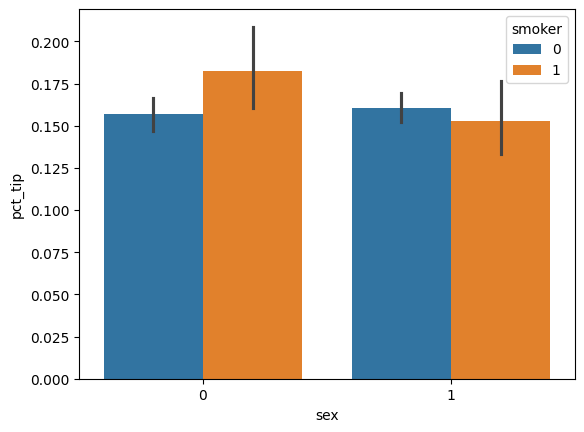

In [36]:
data['sex'].groupby(data["smoker"]).value_counts(normalize=True).rename('pct_tip').reset_index()


# x,y,hue = 'sex','pct_tip','smoker'

# sns.barplot(x,y,hue,data=data)

x, y, hue = 'sex', 'pct_tip', 'smoker'
sns.barplot(x=x, y=y, hue=hue, data=data)


### 16. total_bill 대 팁의 산점도를 만듭니다.

<Axes: xlabel='total_bill', ylabel='tip'>

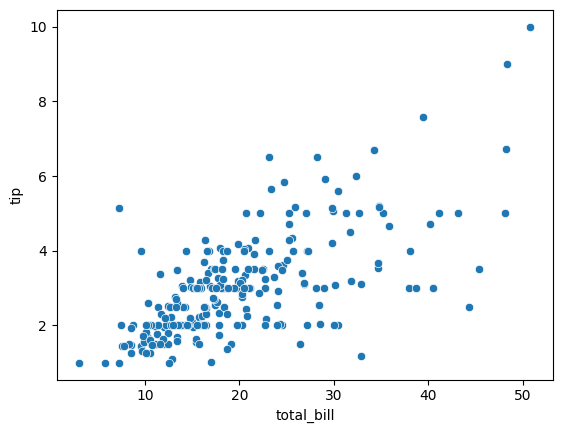

In [37]:
sns.scatterplot(x="total_bill", y = "tip",
               data = data)

### 17. total_bill 대 pct_tip의 산점도를 만듭니다.

<Axes: xlabel='total_bill', ylabel='pct_tip'>

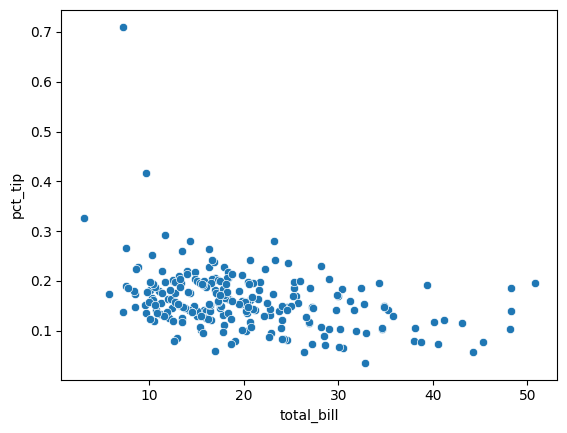

In [38]:
sns.scatterplot(x="total_bill", y = "pct_tip",
               data = data)

In [39]:
data["smoker"].count()

np.int64(244)

### 18. 쌍을 이루는 플롯(Paired Plot)

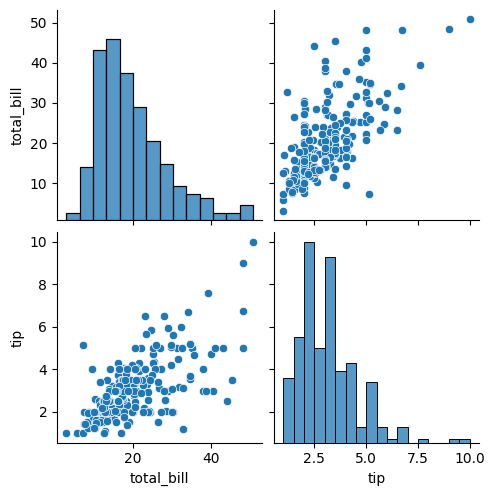

In [40]:
sns.pairplot(data.loc[:, ['total_bill', 'tip']])

In [41]:
#sns.pairplot(data.loc[:, ['total_bill', 'day']])

### 19. 총 청구서 및 팁 비율

In [42]:
#data['tip_rate'] = (data['tip']/data['total_bill'])*100

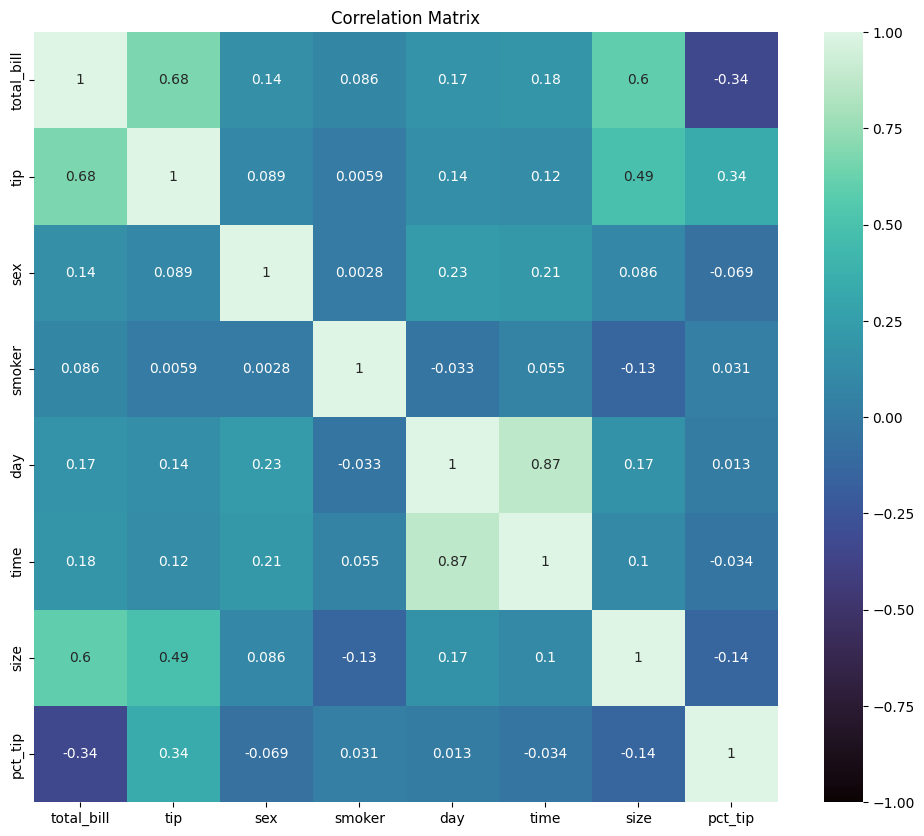

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()